In [1]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/UAP/predic_tabel.csv'

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv(file_path)
df

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak


In [4]:
df = df.drop('No', axis=1)  # Menghapus kolom 'No' dari dataset

# Jumlah dataset

In [5]:
# Mengetahui jumlah dataset menggunakan shape
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 30000 baris, 10 kolom


# jumlah status atau label

In [6]:
label_counts = df['Hasil'].value_counts()
print(label_counts)

Hasil
Tidak    15648
Ya       14352
Name: count, dtype: int64


# Preprocessing

## Cek Missing Value

In [7]:
pd.isnull(df).sum()

,0
Usia,0
Jenis_Kelamin,0
Merokok,0
Bekerja,0
Rumah_Tangga,0
Aktivitas_Begadang,0
Aktivitas_Olahraga,0
Asuransi,0
Penyakit_Bawaan,0
Hasil,0


## Cek Dataset yang duplikat

In [8]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")


Jumlah baris duplikat: 29986


## EDA

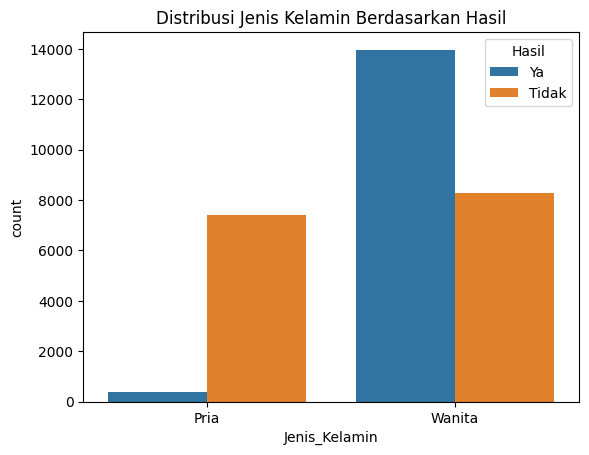

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Jenis Kelamin
sns.countplot(data=df, x='Jenis_Kelamin', hue='Hasil')
plt.title("Distribusi Jenis Kelamin Berdasarkan Hasil")
plt.show()


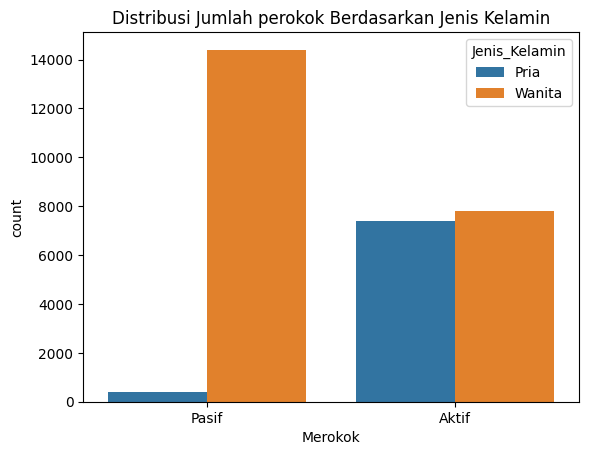

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Jenis Kelamin
sns.countplot(data=df, x='Merokok', hue='Jenis_Kelamin')
plt.title("Distribusi Jumlah perokok Berdasarkan Jenis Kelamin")
plt.show()


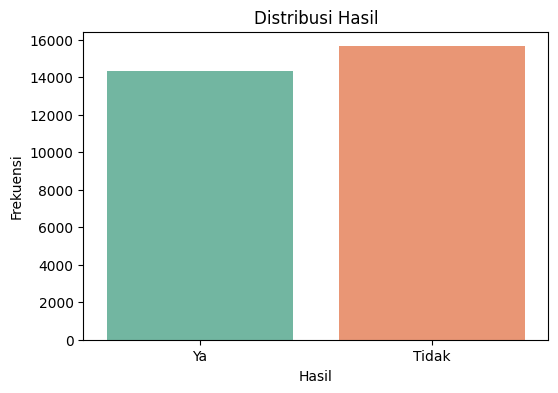

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label y dengan hue dan palette
plt.figure(figsize=(6,4))
sns.countplot(x='Hasil', data=df, hue='Hasil', palette='Set2', legend=False)
plt.title('Distribusi Hasil')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.show()


In [12]:
df.describe()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,2,2,2,2,2,2,2,2,2
top,Muda,Wanita,Aktif,Ya,Ya,Ya,Jarang,Ada,Ada,Tidak
freq,15383,22225,15210,18964,15425,17548,17994,21239,19350,15648


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Usia                30000 non-null  object
 1   Jenis_Kelamin       30000 non-null  object
 2   Merokok             30000 non-null  object
 3   Bekerja             30000 non-null  object
 4   Rumah_Tangga        30000 non-null  object
 5   Aktivitas_Begadang  30000 non-null  object
 6   Aktivitas_Olahraga  30000 non-null  object
 7   Asuransi            30000 non-null  object
 8   Penyakit_Bawaan     30000 non-null  object
 9   Hasil               30000 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu di-encode
columns_to_encode = ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga',
                     'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil']

# Dictionary untuk menyimpan mapping
column_mappings = {}

# Melakukan encoding dan menyimpan mapping
for column in columns_to_encode:
    label_encoder.fit(df[column])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    column_mappings[column] = mapping
    df[column] = label_encoder.transform(df[column])

# Menampilkan hasil encoding
print("Hasil Encoding Dataset:")
print(df.head())

# Menampilkan mapping
print("\nMapping untuk setiap kolom:")
for column, mapping in column_mappings.items():
    print(f"{column}: {mapping}")


Hasil Encoding Dataset:
   Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  Aktivitas_Begadang  \
0     1              0        1        0             1                   1   
1     1              0        0        0             1                   1   
2     0              0        0        0             1                   1   
3     1              0        0        1             0                   0   
4     0              1        1        1             0                   0   

   Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0                   1         0                1      1  
1                   0         0                0      0  
2                   0         0                1      0  
3                   0         0                0      0  
4                   1         1                0      1  

Mapping untuk setiap kolom:
Usia: {'Muda': 0, 'Tua': 1}
Jenis_Kelamin: {'Pria': 0, 'Wanita': 1}
Merokok: {'Aktif': 0, 'Pasif': 1}
Bekerja: {'Tidak': 0, 'Ya': 

## Normalisasi

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Kolom yang akan dinormalisasi (semua kolom numerik)
columns_to_normalize = ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja',
                        'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga',
                        'Asuransi', 'Penyakit_Bawaan']

# Normalisasi data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Menampilkan hasil
print(df.head())


   Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  Aktivitas_Begadang  \
0   1.0            0.0      1.0      0.0           1.0                 1.0   
1   1.0            0.0      0.0      0.0           1.0                 1.0   
2   0.0            0.0      0.0      0.0           1.0                 1.0   
3   1.0            0.0      0.0      1.0           0.0                 0.0   
4   0.0            1.0      1.0      1.0           0.0                 0.0   

   Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0                 1.0       0.0              1.0      1  
1                 0.0       0.0              0.0      0  
2                 0.0       0.0              1.0      0  
3                 0.0       0.0              0.0      0  
4                 1.0       1.0              0.0      1  


## train & split

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('Hasil', axis=1)
y = df['Hasil']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape

(24000, 9)

In [18]:
X_test.shape

(6000, 9)

In [19]:
X_train[:10]

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan
21753,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
251,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
22941,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
618,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
17090,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6362,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24680,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
28329,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
15874,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
22653,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Build Model FFNN

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model = Sequential([
    Input(shape=(X_train.shape[1],)),           # Explicit input layer
    Dense(64, activation='relu'),              # First hidden layer
    Dense(32, activation='relu'),              # Second hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7487 - loss: 0.5865 - val_accuracy: 0.8729 - val_loss: 0.3215
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8869 - loss: 0.2858 - val_accuracy: 0.9354 - val_loss: 0.1803
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9321 - loss: 0.1652 - val_accuracy: 0.9354 - val_loss: 0.1219
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9359 - loss: 0.1177 - val_accuracy: 0.9469 - val_loss: 0.1027
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9433 - loss: 0.1035 - val_accuracy: 0.9469 - val_loss: 0.0944
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9420 - loss: 0.0958 - val_accuracy: 0.9469 - val_loss: 0.0909
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9472 - loss: 0.0896 - val_accuracy: 0.9469 - val_loss: 0.0888
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.0901 - val_accuracy: 0.

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,755 (10.77 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [24]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluasi akurasi pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy * 100:.2f}%")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.0807
Akurasi pada data uji: 94.27%


In [25]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Menghitung classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3075
           1       1.00      0.88      0.94      2925

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



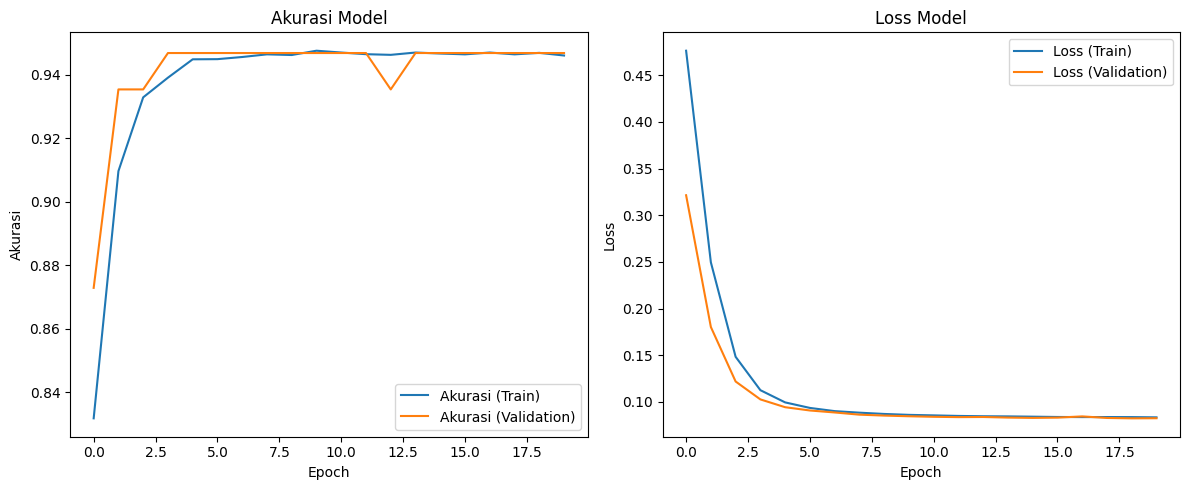

In [27]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi (Train)')
plt.plot(history.history['val_accuracy'], label='Akurasi (Validation)')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Text(95.72222222222221, 0.5, 'Truth')

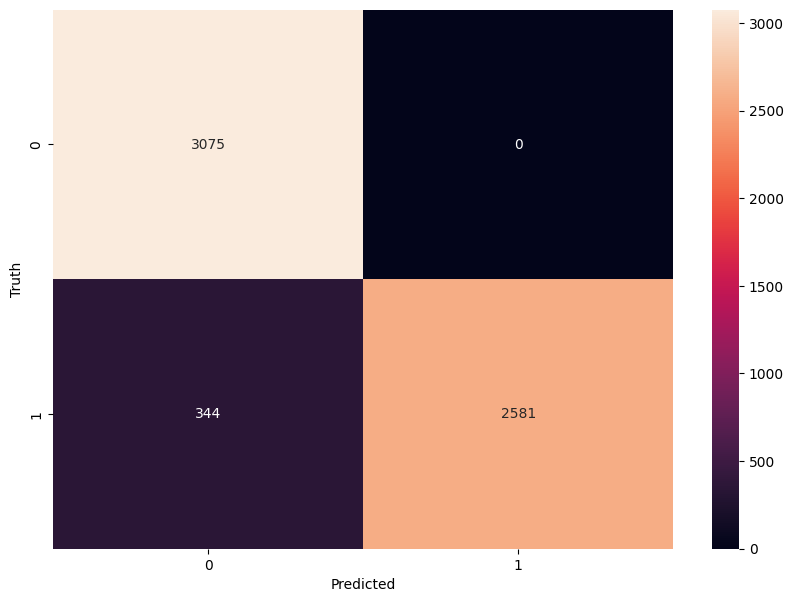

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')